In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_path = "/content/drive/MyDrive/Projeto_IA/description.csv"
images_folder = "/content/drive/MyDrive/Projeto_IA/images"

In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

df = pd.read_csv(csv_path)

df.head()

,Refnum,Bg,Class,Severity,X,Y,Radius,Path,Cancer,Path_save
0,mdb001,G,CIRC,B,535.0,425.0,197.0,mdb001.png,0,images/mdb001.png
1,mdb002,G,CIRC,B,522.0,280.0,69.0,mdb002.png,0,images/mdb002.png
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,mdb003.png,0,images/mdb003.png
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,mdb004.png,0,images/mdb004.png
4,mdb005,F,CIRC,B,477.0,133.0,30.0,mdb005.png,0,images/mdb005.png


In [20]:
def load_image(image_path, size=(224,224)):
    img = Image.open(image_path).convert('L')
    img = img.resize(size)
    img_array = np.array(img) / 255.0
    img_array = np.stack((img_array,)*3, axis=-1)
    return img_array

In [7]:
print(df['Path'].head())

0    mdb001.png
1    mdb002.png
2    mdb003.png
3    mdb004.png
4    mdb005.png
Name: Path, dtype: object


In [9]:
images = []
labels = []

for idx, row in df.iterrows():
    img_path = os.path.join(images_folder, row['Path'])
    if os.path.exists(img_path):
        images.append(load_image(img_path))
        labels.append(row['Cancer'])

In [10]:
X = np.array(images)
print(len(X))
y = np.array(labels)

print(f"Imagens carregadas: {X.shape}")
print(f"Labels carregadas: {y.shape}")

# X = X.reshape(-1, 224, 224, 1)

print(f"Shape final das imagens: {X.shape}")

322
Imagens carregadas: (322, 224, 224, 3)
Labels carregadas: (322,)
Shape final das imagens: (322, 224, 224, 3)


In [11]:
print(df['Cancer'].value_counts())

Cancer
0    271
1     51
Name: count, dtype: int64


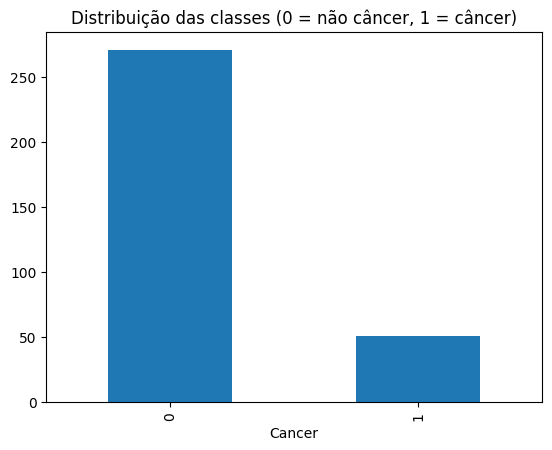

In [12]:
df['Cancer'].value_counts().plot(kind='bar')
plt.title("Distribuição das classes (0 = não câncer, 1 = câncer)")
plt.show()

In [13]:
def show_image_with_circle(row, images_folder, size=(224,224)):
    img_path = os.path.join(images_folder, row['Path'])
    img = Image.open(img_path).convert('L').resize(size)
    img = img.convert('RGB')

    if not pd.isnull(row['X']) and not pd.isnull(row['Y']) and not pd.isnull(row['Radius']):
        draw = ImageDraw.Draw(img)
        x = row['X'] * (size[0] / img.width)
        y = row['Y'] * (size[1] / img.height)
        r = row['Radius'] * (size[0] / img.width)
        leftUpPoint = (x - r, y - r)
        rightDownPoint = (x + r, y + r)
        draw.ellipse([leftUpPoint, rightDownPoint], outline='red', width=2)

    plt.imshow(img)
    plt.title(f"Refnum: {row['Refnum']} - Cancer: {row['Cancer']} - Class: {row['Class']} - Severity: {row['Severity']}")
    plt.axis('off')
    plt.show()

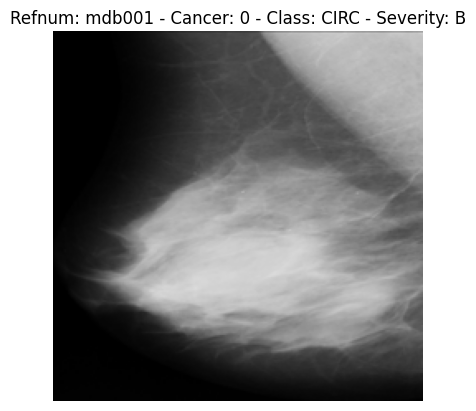

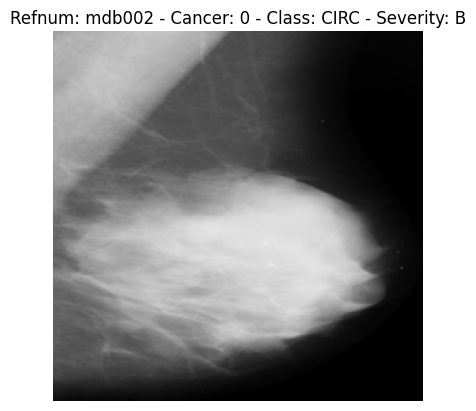

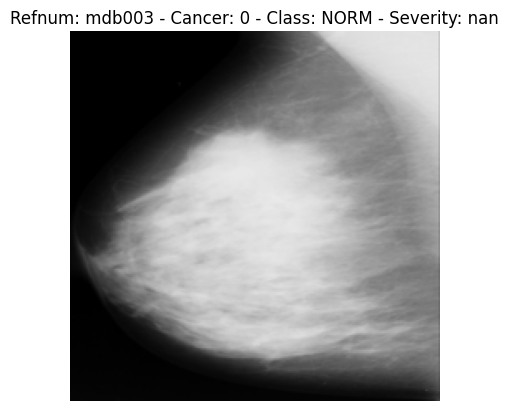

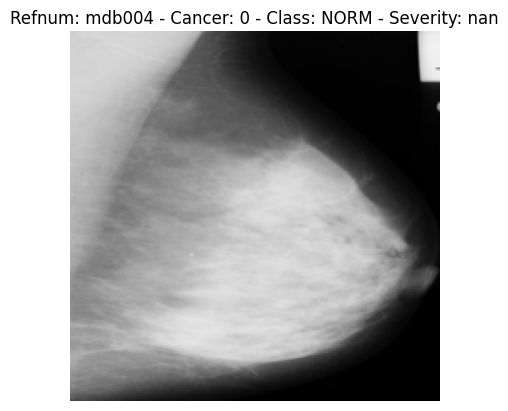

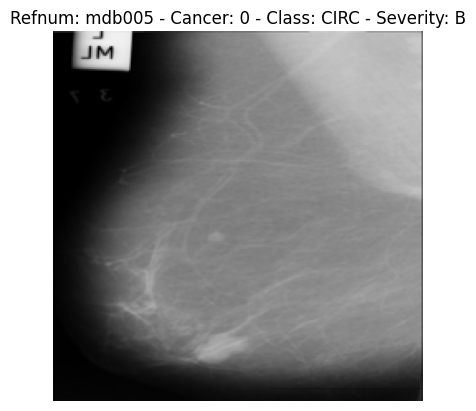

In [14]:
for i in range(5):
    show_image_with_circle(df.iloc[i], images_folder)

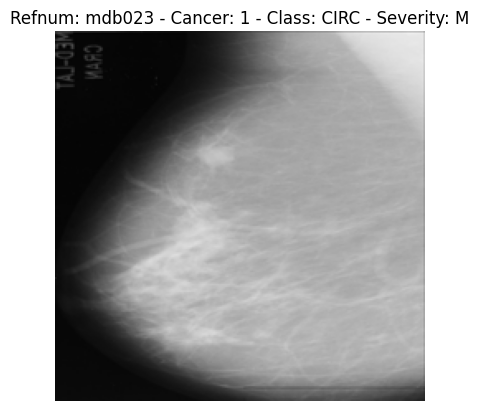

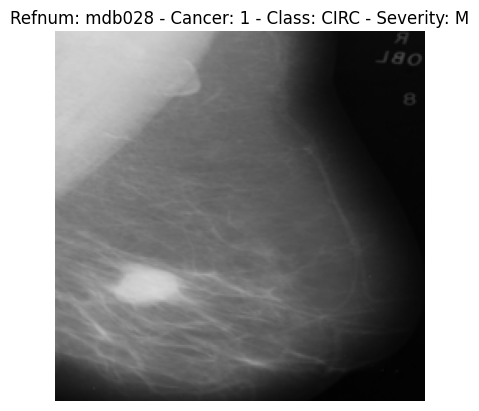

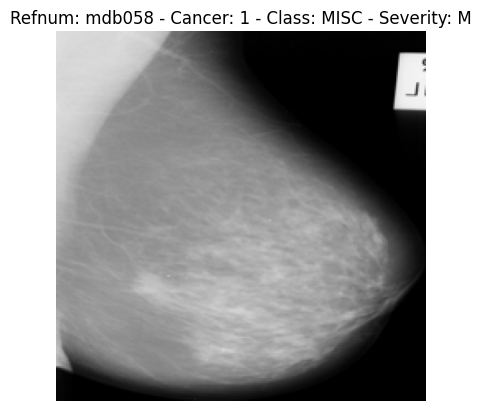

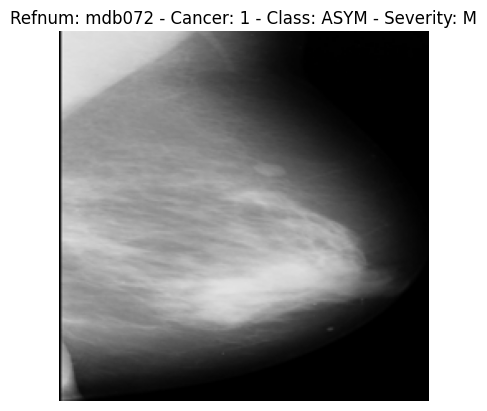

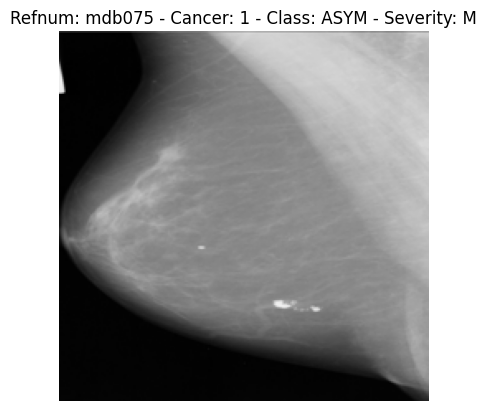

In [25]:
df_com_cancer = df[df['Cancer'] == 1]

for i in range(min(5, len(df_com_cancer))):
    show_image_with_circle(df_com_cancer.iloc[i], images_folder)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.7023 - loss: 2.5384 - val_accuracy: 0.8462 - val_loss: 0.6566
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.7923 - loss: 0.6156 - val_accuracy: 0.8077 - val_loss: 0.6678
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.8260 - loss: 0.4878 - val_accuracy: 0.3462 - val_loss: 0.7730
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 0.2675 - loss: 0.7747
Test accuracy: 0.2615


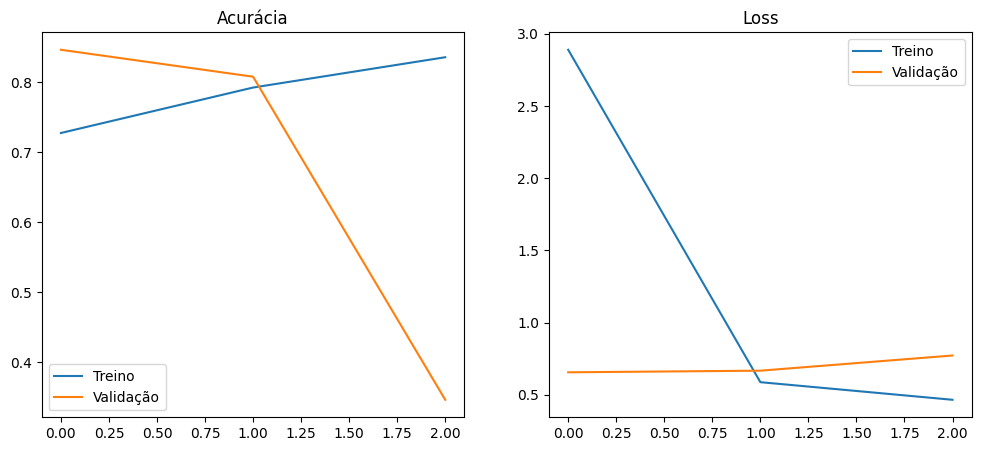

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # saída binária
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,
    batch_size=32
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()
plt.show()
